# Scipy

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [66]:
!kaggle datasets download -d yasserh/wine-quality-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset
License(s): CC0-1.0
wine-quality-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [67]:
wine = pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')

In [68]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [69]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [70]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [71]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [72]:
wine.drop('Id', axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [73]:
# Preprocessing Data
bins = (2, 6.5, 8)
group_names = ['bad','good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [74]:
wine['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [75]:
label_quality = LabelEncoder()

In [76]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [77]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,0,10


In [78]:
wine['quality'].value_counts()

quality
0    984
1    159
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='quality', ylabel='Count'>

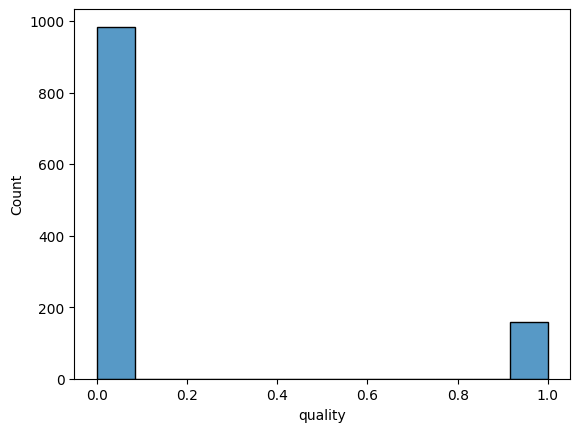

In [79]:
sns.histplot(wine['quality'])

In [80]:
x = wine.drop('quality', axis = 1)
y = wine['quality']

### Train and test splitting of data

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [82]:
# Applying Standard Scaler to get optimized result
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [83]:
x_train[:10]

array([[ 0.1426802 , -1.40273053,  1.5096933 , -0.55102394,  0.11651554,
         1.88559834,  1.79122276,  0.11355786, -0.09314751,  0.56821234,
         0.05661327, -1.72103768],
       [ 0.96843134, -1.17920341,  1.5096933 , -0.39776844, -0.28423884,
        -1.24188154, -1.18572018, -0.7017669 , -1.07474038,  0.4477703 ,
         0.89445566,  0.56050423],
       [ 0.3786091 , -1.23508519,  0.4833938 ,  0.06199805, -0.64280855,
        -0.55774532, -0.21429669, -0.55542656,  0.56124774,  0.20688622,
         1.26683005,  0.18168217],
       [-0.97798208,  1.95017634, -1.1586854 , -0.24451294, -0.43188519,
        -0.36227782, -0.80968528, -0.16866994,  1.41196156, -0.57598704,
        -0.50194833,  1.59365528],
       [-0.38815983, -0.6203856 , -0.08107092,  1.0581588 ,  0.36962357,
         1.20146211,  1.38385162,  0.6048433 , -1.07474038, -0.51576602,
        -1.24669712,  0.51960867],
       [-0.3291776 ,  1.02812695, -1.31263032, -0.32114069, -0.47406986,
         1.49466335, -

## Random Forest Classifier

In [84]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

In [85]:
# Rfc Model performance 
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.98      0.94       201
           1       0.67      0.36      0.47        28

    accuracy                           0.90       229
   macro avg       0.79      0.67      0.70       229
weighted avg       0.89      0.90      0.89       229



In [86]:
print(confusion_matrix(y_test, pred_rfc))

[[196   5]
 [ 18  10]]


## SVM Classifier

In [88]:
clf = SVC()
clf.fit(x_train, y_train)
pred_clf = clf.predict(x_test)

In [89]:
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       201
           1       0.64      0.25      0.36        28

    accuracy                           0.89       229
   macro avg       0.77      0.62      0.65       229
weighted avg       0.87      0.89      0.87       229



In [90]:
print(confusion_matrix(y_test, pred_clf))

[[197   4]
 [ 21   7]]


## Neural Network

In [91]:
nn = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
nn.fit(x_train,y_train)
pred_nn = nn.predict(x_test)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [92]:
print(classification_report(y_test, pred_nn))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       201
           1       0.54      0.50      0.52        28

    accuracy                           0.89       229
   macro avg       0.73      0.72      0.73       229
weighted avg       0.88      0.89      0.88       229



In [93]:
print(confusion_matrix(y_test, pred_nn))

[[189  12]
 [ 14  14]]


In [95]:
from sklearn.metrics import accuracy_score 
ac1 = accuracy_score(y_test, pred_rfc)
ac2 = accuracy_score(y_test, pred_clf)
ac3 = accuracy_score(y_test, pred_nn)
ac1, ac2, ac3

(0.8995633187772926, 0.8908296943231441, 0.8864628820960698)

In [96]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,0,10


In [98]:
x_new = [[7.3, 0.58, 0.00, 2.0, 0.065,15.0, 21.0, 0.9946, 3.36, 0.47, 10.0, 11.0]]
x_new = sc.fit_transform(x_new)
y_new = rfc.predict(x_new)

In [99]:
y_new

array([0])